# Bonus Problem 7

The mirror descent method for solving an optimization problem is described as follows in chapter 9.1-9.2 in A. Beck (2017): 

First we define the Bregman distance as follows: Let $w : E \rightarrow (-\infty , \infty ]$ be a closed and convex function, differentiable over $dom(\partial w)$. The Bregman distance $B_w$ between two points: $x, y$ in respect to this function is the following: 

\begin{equation*}
    B_w(x, y) = w(x) - w(y) - \nabla w(y) \cdot (x-y)
\end{equation*}

The following assumptions are made on $w$ given a set $C$ (Assumption 9.3 in A. Beck (2017))
- $w$ is proper, closed, convex
- $w$ is differentiable over $dom(\partial w)$
- C $\subseteq dom(w)$ 
- $w + \delta_C$ is $\sigma$-strongly convex with $\sigma > 0$

This is used in the definition of the mirror descent method for minimizing an proper closed convex objective function $f$ in a function space E with distance generating functions $w$, over a nonempty closed convex set $C \subseteq E$: 

- Initialize a point in $x^0 \in C \cap dom(\partial w)$
- For any k = 0, 1, 2, ...  do the following: 
  - (a) pick a stepsize $t_k > 0$ and a subgradient $g^k \in \partial f(x^k)$
  - (b) set:   
\begin{align*}
  x^{k+1} & = argmin_{x \in C} \left\{ \left(t_k g^k  - \nabla w(x^k) \right) \cdot x + w(x) \right\} \\
  & \text{which is equivalent to:} \\
  x^{k+1} & = argmin_{x \in C} \left\{ (t_k g^k) \cdot x + B_w(x, x^k) \right\} \\
\end{align*}

The $argmin$ step in the algorithm is not easily translated to a program for a general $w$, which is why the following section focuses on the problem defined as follows:

\begin{equation*}
  E = \mathbb{R}^n
\end{equation*}

\begin{equation*}
  C = \Delta_n
\end{equation*}

\begin{equation*}
  w(x) = 
    \begin{cases} 
      \sum_{i=1}^n x_i log(x_i), &  x \in \mathbb{R}_+^n \\ 
      \infty,  & else.
    \end{cases} 
\end{equation*} 

Where $0log(0)$ is defined as $0$. In Example 9.10 in A. Beck (2017), it is noted that this function comforms to the assumptions made in Assumption 9.3, with 1-strong convexity in respect to the $l_1$ norm. Additionally, the formula for the solution of the $argmin$ expression in the mirror descent method is proven to be the following for this situation: 

\begin{align*}
  x^{k+1} & = argmin_{x \in C} \left\{ (t_k g^k) \cdot x + B_w(x, x_k) \right\} \\
          & = (x^{k+1}_i, ... , x^{k+1}_n) \quad \text{where:} \\
  x^{k+1}_i &= \frac{x_i^k e^{-t_k g^k_i}}{\sum_{j=1}^n x^k_j e^{-t_k g_j^k}}
\end{align*}

The problem that we will solve in this exercise is the following: 

\begin{align*}
 & \text{minimize} & f(x) \\
 & \text{subject to } & x \in \Delta_n  \\
\end{align*}

where $(a_i, b_i) \in \mathbb{R}^n \times \mathbb{R}$ for each $i = 1, ... , m $, $\Delta_n$ is the unit simplex and $f(x)$ is defined as: 

\begin{equation*}
  f(x) = \underset{i=1, ..., m}{max}\left|  a_i^T x + b_i \right|
\end{equation*}

In the problem formulation it is stated that: 

\begin{equation*}
  g^k = a_i sgn(a_i^T x^k + b_i) \in \partial f(x^k)
\end{equation*}

where $i \in \{1, ... , m \}$ is any index such that: 

\begin{equation*}
  f(x) = \underset{j=1, ..., m}{max}\left|  a_j^T x + b_j \right| = \left|  a_i^T x + b_i \right|
\end{equation*}

This is the expression we will use for $g^k$ in the mirror descent algorithm to select a subgradient of $f$. 

Additionally, the problem description defines: 

\begin{equation*}
  L_{f,\infty} = \underset{i=1, ..., m}{max} || a_i ||_\infty
\end{equation*}

The following steps should be taken for each iteration in the algorithm according to the problem description:

- Select $g^k \in \partial f(x^k)$, where $g^k$ is defined as above.
- Select $\gamma^k = \frac{\sqrt{2}}{L_{f, \infty} \sqrt{k+1}}$ 
- Take the argmin step in the mirror algorithm as follows: 

\begin{align*}
  x^{k+1} & = argmin_{x \in \Delta_n} \left\{ f(x^k) + (g^k)^T(x - x^k) + \frac{1}{\gamma^k} B_w(x, x^k) \right\} \quad \text{[We remove terms constant in x]} \\
  & = argmin_{x \in \Delta_n} \left\{ g^k \cdot x + \frac{1}{\gamma^k} B_w(x, x^k) \right\} \quad \text{[We can multiply by $\gamma^k$ without changing the argmin]} \\
  & = argmin_{x \in \Delta_n} \left\{\gamma^k g^k \cdot x + B_w(x, x^k) \right\} \quad \text{[We can use the equivalent definition defined above]} \\
  & = argmin_{x \in \Delta_n} \left\{ \left(\gamma^k g^k  - \nabla w(x^k) \right) \cdot x + w(x) \right\}
\end{align*}

With the distance generating function $w: \mathbb{R}^n \rightarrow  \mathbb{R}^n \cup \{ \infty \}$ is given as previously defined above. We know that this argmin step has the following solution which will be used the implemented algorithm: 

\begin{align*}
  x^{k+1} & = (x^{k+1}_i, ... , x^{k+1}_n) \quad \text{where:} \\
  x^{k+1}_i &= \frac{x_i^k e^{-\gamma^k g^k_i}}{\sum_{j=1}^n x^k_j e^{-\gamma^k g_j^k}}
\end{align*}


In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def f(ai_s, bi_s, x):
    """Returns the value of the function f(x) = max_i |a_i^T x + b_i| at x. 
        Also returns the first found index "i" that achieves the maximum.  

    Args:
        ai_s (List): A list of np.arrays for the vectors a_i.
        bi_s (List): A list of bias terms.
        x (np.array): The point at which the function is evaluated.

    Returns:
        (np.float, int): A tuple containing the value of the function and the index of the first found maximizer.
    """
    max_val = -np.inf
    index = -1
    for i in range(len(ai_s)):
        cur_val = np.abs(ai_s[i] @ x + bi_s[i])
        if cur_val > max_val:
            max_val = cur_val
            index = i
    return max_val, index

def subdifferential_f(ai_s, bi_s, x):
    """Returns one element in the subdifferential of f(x) at x. 

    Args:
        ai_s (List): A list of np.arrays for the vectors a_i.
        bi_s (List): A list of bias terms.
        x (np.array): The point at which the function is evaluated.
    
    Returns:
        np.array: A subgradient of f(x) at x.
    """
    
    _f_val, max_index = f(ai_s, bi_s, x)
    return ai_s[max_index] * int(np.sign(ai_s[max_index] @ x + bi_s[max_index]))

def L_f_inf(ai_s):
    """Computes the value of L_{f,inf} for the function f(x) = max_i |a_i^T x + b_i|.

    Args:
        ai_s (List): A list of np.arrays for the vectors a_i. 

    Returns:
        np.float: The value of L_{f,inf}.
    """
    L_candidates = [np.linalg.norm(ai, ord = np.inf) for ai in ai_s] 
    L_max = np.max(L_candidates)
    return L_max
    
def mirror_argmin_solution(g_k, gamma_k, x_k):
    """Computes the solution of the argmin step in the Mirror Descent algorithm.

    Args:
        g_k (np.array): The chosen subgradient of f(x) at x_k. 
        gamma_k (np.float): The stepsize used for this iteration. 
        x_k (np.array): The previous iterate of the Mirror Descent algorithm.

    Returns:
        np.array: The next iterate of the Mirror Descent algorithm.
    """
    normalizing_term = np.sum(x_k * np.exp(-1*gamma_k * g_k))
    sum = 0
    for i in range(len(x_k)):
        sum += x_k[i] * np.exp(-gamma_k * g_k[i])

    x_next = np.zeros(len(x_k))
    for i in range(len(x_k)):
        x_next[i] = (x_k[i] * np.exp(-gamma_k * g_k[i])) / normalizing_term
    return x_next

def mirror_descent(ai_s, bi_s, x_0, num_iter=1000):
    """An implementation of the Mirror Descent algorithm 
        for the problem defined in this notebook. 

    Args:
        ai_s (List): A list of np.arrays for the vectors a_i.
        bi_s (List): A list of bias terms.
        x_0 (_type_): The starting point of the algorithm.
        num_iter (int, optional): Number of iteration to run the algorithm. Defaults to 1000.

    Returns:
        (np.array, List, List): A tuple containing the final iterate of the algorithm, a list of the function values at each iteration, and a list of the best function values at each iteration.
    """
    L_inf = L_f_inf(ai_s)
    f_vals = np.zeros(num_iter)
    f_best_vals = np.zeros(num_iter)
    f_best = f(ai_s, bi_s, x_0)[0]
    x_cur = x_0
    for k in range(num_iter):
        g_cur = subdifferential_f(ai_s, bi_s, x_cur)
        gamma_cur = np.sqrt(2 / (k + 1)) / L_inf
        x_next  = mirror_argmin_solution(g_cur, gamma_cur, x_cur)

        x_cur = x_next

        # Storing the function values for plotting
        f_val = f(ai_s, bi_s, x_cur)[0]
        if f_val < f_best:
            f_best = f_val
        f_best_vals[k] = f_best 
        f_vals[k] = f_val

    return x_cur, f_vals, f_best_vals

In [17]:
# Data specifications, generating the optimization problem
m = 20
n = 2000

ai_s = []
bi_s = []
for i in range(1, m+1):
    ai = np.random.randn(n)
    ai_s.append(ai)
    
    epsilon_i = 10**-1 * np.random.randn() ## Multiply standard normal distribution by 10^-1 to get variance of 10^-2
    bi = (ai[0] + ai[1])/2 + epsilon_i
    bi_s.append(bi)

# Generate the starting point:
x_0 = 1/n * np.ones(n)

In [23]:
# Solving the problem using the mirror descent algorithm
x_star, f_evals, f_best_evals = mirror_descent(ai_s, bi_s, x_0, num_iter=50000)

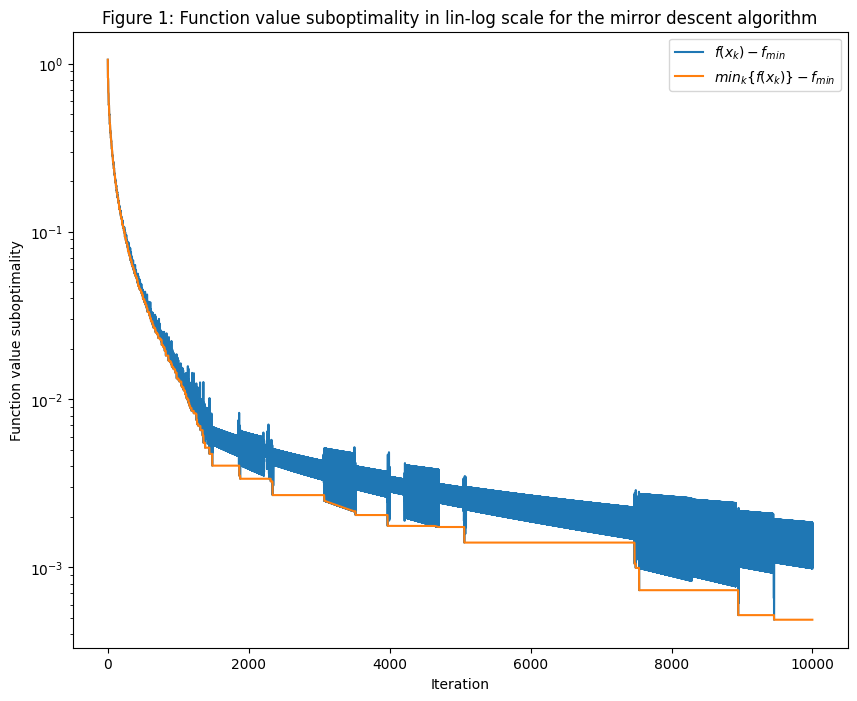

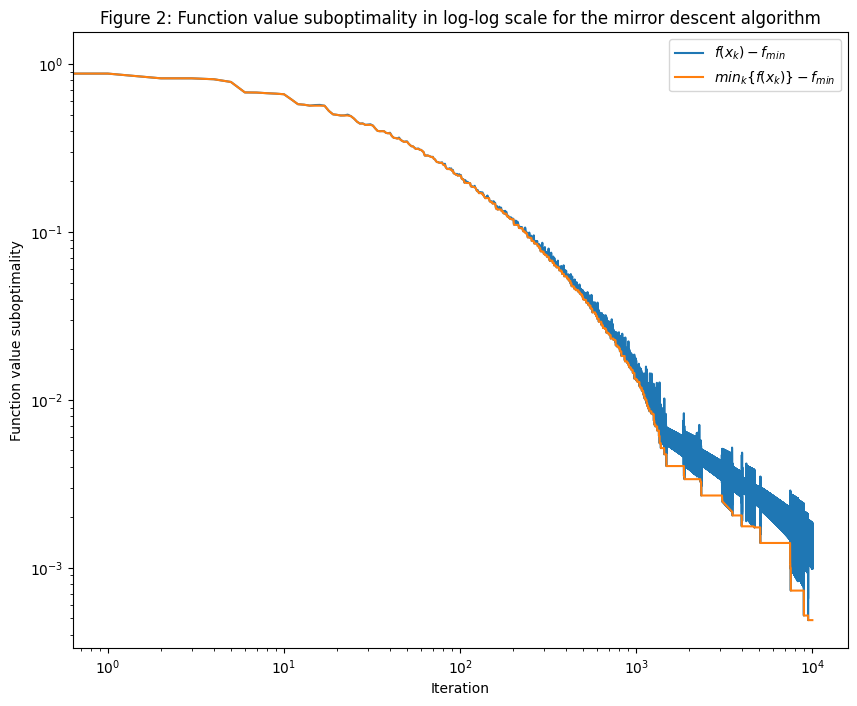

In [24]:
best_function_value = f(ai_s, bi_s, x_star)[0]

# Plotting 
plt.figure(figsize=(10, 8))
plt.plot(f_evals[0:10**4] - best_function_value, label='$f(x_k) - f_{min}$')
plt.plot(f_best_evals[0:10**4] - best_function_value, label='$min_k \{f(x_k)\} - f_{min}$')
plt.title("Figure 1: Function value suboptimality in lin-log scale for the mirror descent algorithm")
plt.xlabel('Iteration')
plt.ylabel('Function value suboptimality')
plt.legend()
plt.yscale('log')

# Plotting 
plt.figure(figsize=(10, 8))
plt.plot(f_evals[0:10**4] - best_function_value, label='$f(x_k) - f_{min}$')
plt.plot(f_best_evals[0:10**4] - best_function_value, label='$min_k \{f(x_k)\} - f_{min}$')
plt.title("Figure 2: Function value suboptimality in log-log scale for the mirror descent algorithm")
plt.xlabel('Iteration')
plt.ylabel('Function value suboptimality')
plt.legend()
plt.yscale('log')
plt.xscale('log')

In [20]:
print(sum(x_star)) # Should be close to 1

0.9999999999999986


In A. Beck (2017) Theorem 9.18 describes the convergence rate of the mirror descent algorithm when using a dynamic stepsize $t_k$ (or in our case where we have used $\gamma^k$ as notation for stepsize). We state a subset of this Theorem here: 

For problems that conform to Assumptions 9.1 and 9.3 in A. Beck (2017) and $L_f \geq || g^k||_*$ for any $x \in C$ and for some $L_f > 0$, then the following holds: Let $\{x^k\}_{k \geq 0}$ be the sequence generated by the mirror descent method with positive stepsizes $\{\gamma^k\}_{k \geq 0}$, and let $\{f^k_{\text{best}}\}_{k \geq 0}$ be the sequence of best achieved values: 

\begin{equation*}
    f^k_{\text{best}} = \underset{n = 0, 1, ... , k}{\text{min}} f(x^n)
\end{equation*}

Then the following holds: 

If $\gamma^k$ is chosen as: 

\begin{align*}
    \gamma^k = \frac{\sqrt(2\sigma)}{L_f\sqrt{k+1}}    
\end{align*}

then for all $k \geq 1$:

\begin{align*}
    f_{best}^k - f_{opt} \leq \frac{L_f}{\sqrt{2\sigma}}\frac{B_w(x^*, x^0) + 1 + log(k+1)}{\sqrt{k + 1}}
\end{align*}

Where $f_{opt}$ is the optimal value of the objective function and $\sigma$ is the strong-convexity constant for the distance generating function $w$. 

The problem formulation for this exercise conforms to the assumptions required by the Theorem, and since:

\begin{align*}
    (||g^k||_1)_* = ||g^k||_\infty \leq L_{f, \infty}
\end{align*}

Our implementation should conform to this upper bound on the function value suboptimality with a sublinear rate. 

In Figures 1 and 2, we can observe that the theoretical upper bound on the convergence of the function value suboptimality seems to hold, as we achieve a sublinear rate with the implementation of the mirror descent algorithm.  